# Uber Analysis
## Introduction
This analysis explores Uber ride bookings in NCR to understand demand, cancellation patterns, vehicle usage, and pricing trends. The goal is to provide actionable insights for operational efficiency and business decisions.


In [2]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import git

### Data Preparation
- Loaded dataset and checked for duplicates.
- Converted `Date` and `Time` columns to datetime.
- Added features: Year, Month, Day, Hour, Weekday.
- Combined customer and driver cancellation reasons into a single column.

In [3]:
# Load the dataset

uberDf = pd.read_csv('Datasets/ncr_ride_bookings.csv')
uberDf.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [4]:
# Check and drop for duplicates
uberDf.duplicated().sum()
# uberDf.drop_duplicates()

np.int64(0)

In [5]:
# Check data types and null values
uberDf.info()
# Summary statistics
uberDf.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


In [6]:
# Explore dtype of date
type(uberDf['Date'][0])

str

In [7]:
# Convert date and time column to datetime format. Add weekday column
uberDf['Date'] = pd.to_datetime(uberDf['Date'], format='%Y-%m-%d')
uberDf['Time'] = pd.to_datetime(uberDf['Time'], format='%H:%M:%S')
uberDf['Weekday'] = uberDf['Date'].dt.day_name()
uberDf['Year'] = uberDf['Date'].dt.year
uberDf['Month'] = uberDf['Date'].dt.month
uberDf['Day'] = uberDf['Date'].dt.day
uberDf.head()



,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,Weekday,Year,Month,Day
0,2024-03-23,1900-01-01 12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Saturday,2024,3,23
1,2024-11-29,1900-01-01 18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI,Friday,2024,11,29
2,2024-08-23,1900-01-01 08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,627.0,13.58,4.9,4.9,Debit Card,Friday,2024,8,23
3,2024-10-21,1900-01-01 17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,416.0,34.02,4.6,5.0,UPI,Monday,2024,10,21
4,2024-09-16,1900-01-01 22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,737.0,48.21,4.1,4.3,UPI,Monday,2024,9,16


In [10]:
# Unify cancellation reasons into a single column
def unify_tripNotCopmpleted_reason(row):
    if pd.notnull(row['Reason for cancelling by Customer']):
        return row['Reason for cancelling by Customer']
    elif pd.notnull(row['Driver Cancellation Reason']):
        return row['Driver Cancellation Reason']
    elif pd.notnull(row['Incomplete Rides Reason']):
        return row['Incomplete Rides Reason']
    else:
        return np.nan
    
def unify_tripNotCopmpleted_source(row):
    if pd.notnull(row['Reason for cancelling by Customer']):
        return 'Customer - Cancellation'
    elif pd.notnull(row['Driver Cancellation Reason']):
        return 'Driver - Cancellation'
    elif pd.notnull(row['Incomplete Rides Reason']):
        return 'Incomplete Ride'
    else:
        return np.nan
    
uberDf['Trip not Completed Reason'] = uberDf.apply(unify_tripNotCopmpleted_reason, axis=1)
uberDf['Trip not Completed Source'] = uberDf.apply(unify_tripNotCopmpleted_source, axis=1)


## Exploratory Data Analysis (EDA)

In the EDA, the goal is to examine trends and patterns, explore the data, and extract actionable business insights. The following aspects are analyzed:
 1) Ride Demand: Indetify demand patters by plotting the number of rides per: 
    1.a) weekday
    1.b) hour
    1.c) month

 2) Vehicle Type Analysis:Compared ride distance and booking value by vehicle type using boxplots and scatterplots.

 3)  Cancellations:Analyzed cancellation reasons split by customer vs driver.


#### 1.a) Number of Rides per weekday

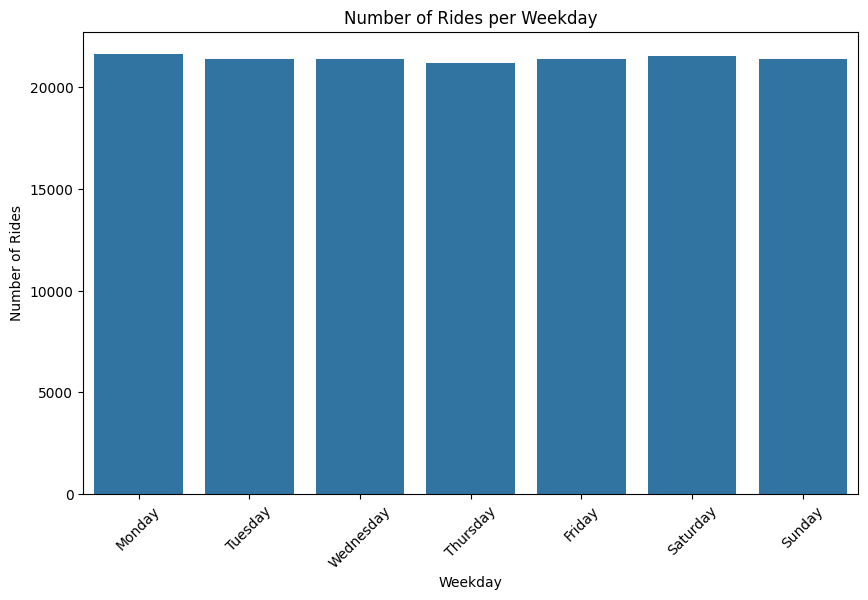

In [11]:
# Plot number of rides per weekday

plt.figure(figsize=(10, 6))

# Define correct weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Count rides per weekday and plot
sns.countplot(data=uberDf, x='Weekday', order=weekday_order)

plt.title("Number of Rides per Weekday")
plt.xlabel("Weekday")
plt.ylabel("Number of Rides")
plt.xticks(rotation=45)
plt.show()

#### 1.b) Number of rides per Month

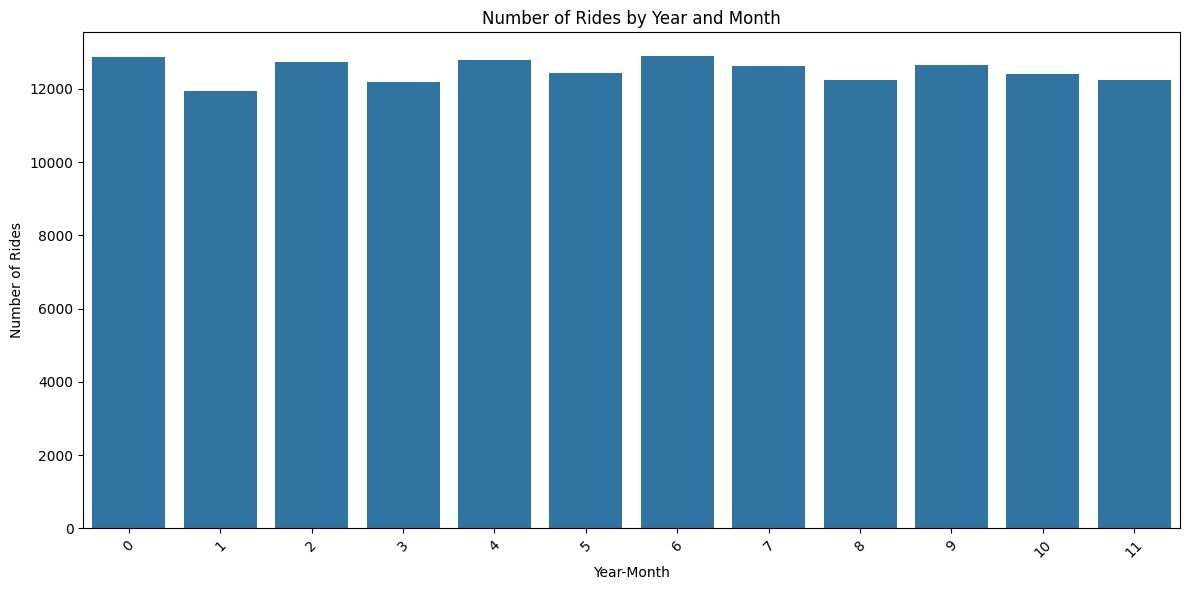

In [12]:
# Plot number of rides by year and month
plt.figure(figsize=(12, 6))

monthly_counts = uberDf.groupby(['Year', 'Month']).size().reset_index(name='Ride_Count')
sns.barplot(data=monthly_counts, x=monthly_counts.index, y='Ride_Count')
plt.title('Number of Rides by Year and Month')
plt.xlabel('Year-Month')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 1.b) Number of rides per Hour of the day

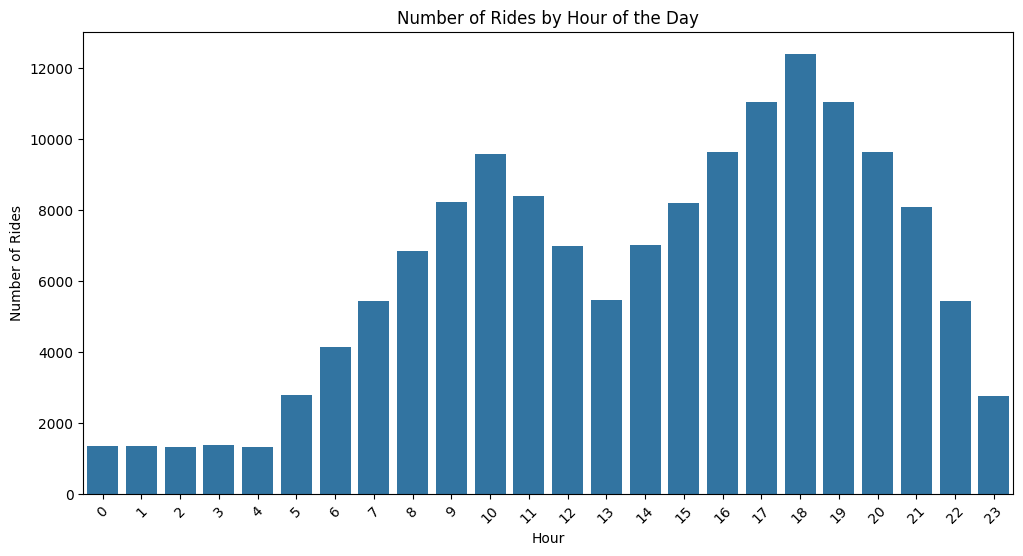

In [13]:
# Plot number of rides by hour of the day

# Group by hour and count rides
hourly_counts = uberDf.groupby((uberDf['Time']).dt.hour).size().reset_index(name='Ride_Count')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=hourly_counts, x='Time', y='Ride_Count')
plt.title('Number of Rides by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.show()



#### Ride Demand: Business Insights
- No seasonality: Ride demand remains consistent across months, showing no major seasonal trends.
- Even weekly distribution: Rides are fairly balanced across days of the week, with no single day dominating.
- Clear hourly peaks: Demand spikes between 8:00–11:00 (morning commute hours) and 16:00–19:00 (evening commute hours). Outside these windows, demand is relatively flat.


Implication: Operations should focus on driver availability during peak commuting times rather than expecting major shifts by season or weekday.


#### 2) Vehycle Type Analysis: ride distance and booking value 

Booking Value Summary Statistics by Vehicle Type: Booking Value (INR) 

    Vehicle Type    count        mean   min     25%    50%    75%     max
0           Auto  25415.0  506.725241  50.0  233.50  414.0  688.0  4220.0
1           Bike  15362.0  510.200299  50.0  234.25  416.0  692.0  4228.0
2        Go Mini  20364.0  507.684934  50.0  232.00  412.0  690.0  4277.0
3       Go Sedan  18318.0  511.503385  50.0  236.00  416.0  692.0  4088.0
4  Premier Sedan  12315.0  509.568169  50.0  236.00  416.0  691.5  4008.0
5        Uber XL   3045.0  501.816749  50.0  237.00  406.0  673.0  3703.0
6          eBike   7181.0  503.897090  50.0  229.00  410.0  676.0  4093.0


 Booking Value Summary Statistics by Vehicle Type: Ride Distance (Km) 

    Vehicle Type    count       mean   min     25%     50%    75%    max
0           Auto  25415.0  24.615996  1.01  12.355  23.610  36.91  50.00
1           Bike  15362.0  24.649546  1.00  12.430  23.760  36.79  50.00
2        Go Mini  20364.0  24.612090  1.00 

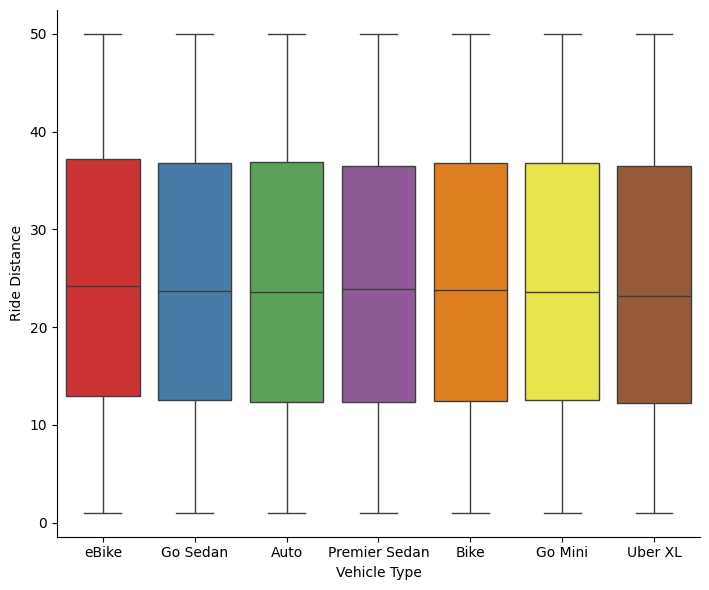

In [14]:
# Booking value summary statistics by vehicle type
print("Booking Value Summary Statistics by Vehicle Type: Booking Value (INR) \n")
summary_table = uberDf.groupby('Vehicle Type')['Booking Value'].describe()[['count', 'mean', 'min', '25%', '50%', '75%', 'max']]
summary_table = summary_table.reset_index()
print(summary_table)

# Booking value summary statistics by vehicle type
print("\n\n Booking Value Summary Statistics by Vehicle Type: Ride Distance (Km) \n")
summary_table_ride = uberDf.groupby('Vehicle Type')['Ride Distance'].describe()[['count', 'mean', 'min', '25%', '50%', '75%', 'max']]
summary_table_ride = summary_table_ride.reset_index()
print(summary_table_ride)

# Box plot of ride distances by vehicle type
g = sns.catplot(
    data=uberDf,
    x='Vehicle Type',
    y='Ride Distance',
    kind='box',
    height=6,
    aspect=1.2,
    hue='Vehicle Type',
    palette='Set1'
)

g.set_axis_labels("Vehicle Type", "Ride Distance")


#### Vehycle Type Analysis: Business Insights

Booking Value (upper table)

- Consistency across vehicle types: The mean booking value is very close for all types
- Range & outliers: Minimum is always 50 INR (likely the base fare), but maximums differ (Uber XL max ~3700 vs Go Mini ~4277). Larger vehicles (Uber XL, Premier Sedan) have slightly lower max values, perhaps due to trip type/availability.

Ride Distance (lower table)

- Uniformity: Mean ride distances hover around ~24.6 km for almost all types — very consistent.
- Range: Min always ~1 km, max capped at ~50 km (suggests either a system-imposed distance cap or dataset truncation).


### 3) Cancelling Reason Analysis

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Customer related issue'),
  Text(1, 0, 'The customer was coughing/sick'),
  Text(2, 0, 'Personal & Car related issues'),
  Text(3, 0, 'More than permitted people in there'),
  Text(4, 0, 'Customer Demand'),
  Text(5, 0, 'Vehicle Breakdown'),
  Text(6, 0, 'Other Issue'),
  Text(7, 0, 'Wrong Address'),
  Text(8, 0, 'Change of plans'),
  Text(9, 0, 'Driver is not moving towards pickup location'),
  Text(10, 0, 'Driver asked to cancel'),
  Text(11, 0, 'AC is not working')])

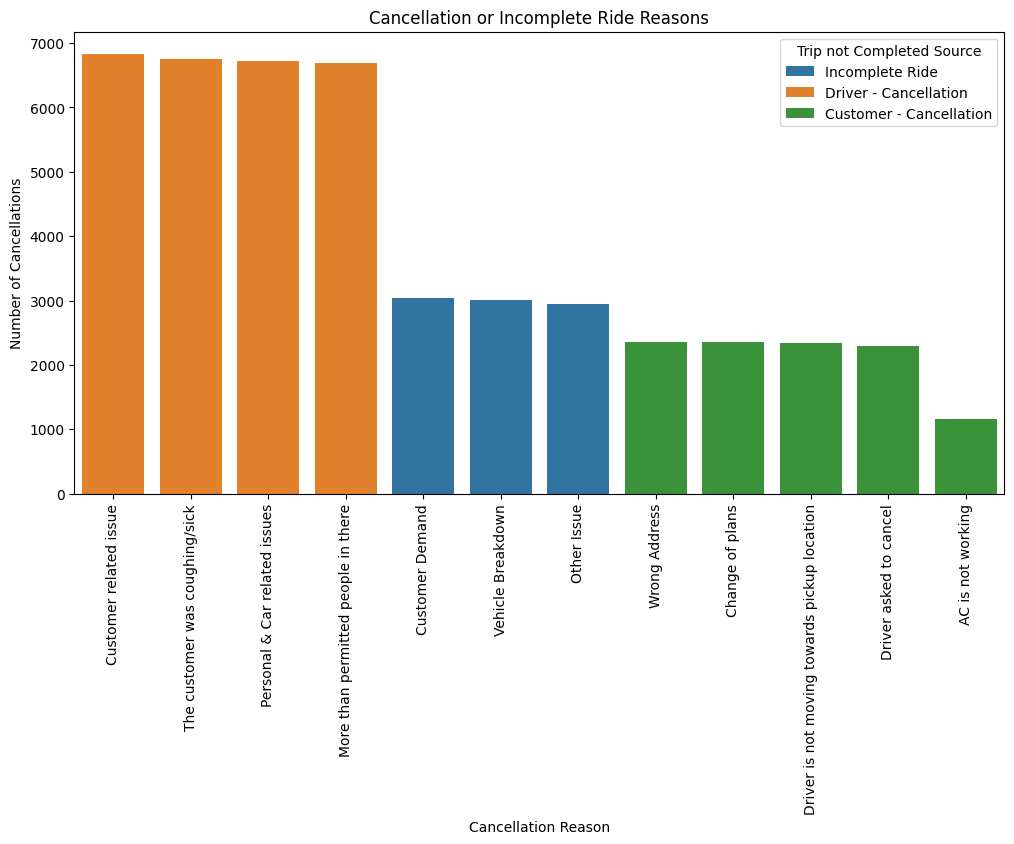

In [15]:
# Plot Cancellation Reason
plt.figure(figsize=(12, 6))
sns.countplot(data=uberDf, x='Trip not Completed Reason', hue='Trip not Completed Source', order=uberDf['Trip not Completed Reason'].value_counts().index)
plt.title('Cancellation or Incomplete Ride Reasons')
plt.xlabel('Cancellation Reason')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=90)


#### Cancellation or Incomplete Ride Reasons Analysis: Business Insights

- Driver related cancellations dominate (customer issues, sickness, personal reasons) → suggests weak incentives or lack of guidelines for drivers.
- Operational issues (vehicle breakdown, demand mismatch) point to fleet reliability and supply allocation challenges.
- Customer cancellations are fewer but highlight UX/service gaps (wrong address, driver delays, AC not working).

Recommendations:
- Strengthen driver policies & incentives to reduce avoidable cancellations.
- Improve fleet maintenance and demand forecasting.
- Enhance app accuracy (addresses, driver tracking) to reduce customer frustration.

